# Introduction to SciKitLearn



What we'll cover:

0. An end-to-end Scikit-Learn workflow
1. Getting Data Ready
2. Choosing the right estimator (or algorithm)
3. Fit the model/algorithm and use it to make predictions
4. Evaluate a model
5. Improve a model
6. Save and load a trained model
7. Put it all together

##  0 an end to end Scikit-Learn Workflow

In [1]:
# 1 Get the data ready
import pandas as pd 
import numpy as np
hd = pd.read_csv("heart-disease.csv")
hd

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


# Create X - Features Matrix (All the independent variables)

In [2]:
X = hd.drop("target", axis = 1 ) # drop the column that will be the y variable and keep all others

# Create the y (labels)

In [3]:
y = hd["target"]

In [4]:
import sklearn
# sklearn. __version__
sklearn.show_versions()


System:
    python: 3.7.10 | packaged by conda-forge | (default, Feb 19 2021, 15:59:12)  [Clang 11.0.1 ]
executable: /opt/anaconda3/bin/python
   machine: Darwin-19.6.0-x86_64-i386-64bit

Python dependencies:
          pip: 21.1.2
   setuptools: 49.6.0.post20210108
      sklearn: 0.24.2
        numpy: 1.20.2
        scipy: 1.6.2
       Cython: 0.29.23
       pandas: 1.2.4
   matplotlib: 3.4.2
       joblib: 1.0.1
threadpoolctl: 2.1.0

Built with OpenMP: True


 # 2- Choose the right model and hyperparameters. Here we want 'classification' because we want to know who has heart disease or not
    

### Hyperparameters are like dials on a model that you can turn to tune the model to make it better or worse

In [5]:
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier(n_estimators=100)

# We'll keep the default hyperparameters
clf.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

# 3 Fit the model to the data

In [6]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [7]:
clf.fit(X_train, y_train)

RandomForestClassifier()

 # Make a prediction

In [8]:
y_preds = clf.predict(X_test) # we are passing in a matrix with the appropriate dimensions
y_preds

array([0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0,
       1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1,
       0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1])

In [9]:
y_test

236    0
263    0
10     1
40     1
109    1
      ..
114    1
240    0
248    0
285    0
162    1
Name: target, Length: 61, dtype: int64

# Evaluate the model on the training data

In [10]:
clf.score(X_train, y_train) # The training data performed at 100% accuracy on the training data

1.0

In [11]:
clf.score(X_test, y_test) #performs with a 75% accuracy on the test, which is good- 100% would be TOO good

0.819672131147541

In [12]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

print(classification_report(y_test, y_preds)) # here we are comparing the test labels to the prediction labels

              precision    recall  f1-score   support

           0       0.85      0.76      0.80        29
           1       0.80      0.88      0.84        32

    accuracy                           0.82        61
   macro avg       0.82      0.82      0.82        61
weighted avg       0.82      0.82      0.82        61



In [13]:
confusion_matrix(y_test, y_preds)

array([[22,  7],
       [ 4, 28]])

In [14]:
accuracy_score(y_test, y_preds)

0.819672131147541

# Can we improve the model
### Can we try different amount of n_estimators

In [15]:
np.random.seed(42)
for i in range(10, 100, 10):
    print(f'Trying model with {i} estimators....')
    clf = RandomForestClassifier(n_estimators=i).fit(X_train, y_train) 
    #Note: we're improving our model by adjusting one of the hyperparameters
    print(f'Model accuracy on test set: {clf.score(X_test, y_test)*100:.2f}%')

Trying model with 10 estimators....
Model accuracy on test set: 78.69%
Trying model with 20 estimators....
Model accuracy on test set: 83.61%
Trying model with 30 estimators....
Model accuracy on test set: 81.97%
Trying model with 40 estimators....
Model accuracy on test set: 83.61%
Trying model with 50 estimators....
Model accuracy on test set: 83.61%
Trying model with 60 estimators....
Model accuracy on test set: 83.61%
Trying model with 70 estimators....
Model accuracy on test set: 81.97%
Trying model with 80 estimators....
Model accuracy on test set: 83.61%
Trying model with 90 estimators....
Model accuracy on test set: 81.97%


 # Save a model and load it

In [16]:
import pickle

pickle.dump(clf, open("random_forest_model_1.pk1", "wb"))

In [17]:
loaded_model = pickle.load(open("random_forest_model_1.pk1", "rb"))
loaded_model.score(X_test, y_test) #the output should line up with the last model above (90 estimators)

0.819672131147541

In [18]:
# Question: could I have chosen a specific tuned-model from above

# Closer Look: Preparing The Data
#### Data usually has to be made ready to use in an ML environment

Three main things we need to do:

1. Split the data into features and labels (usually "X"- features and "y"- labels)
2. Filling (also called imputing) or diregarding missing values
3. Converting non-numerical values to numerical values (also called feature encoding)


In [19]:
hd.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [20]:
# We'll use the feature columns to predict 'y'
X= hd.drop("target", axis = 1)


In [21]:
X # so X is every other column except "target"

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3


In [22]:
y =hd["target"]

In [23]:
y 

0      1
1      1
2      1
3      1
4      1
      ..
298    0
299    0
300    0
301    0
302    0
Name: target, Length: 303, dtype: int64

#### You must now split the data into training and test sets

In [24]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2) # so we use 80% of data to train the model

In [25]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape 

((242, 13), (61, 13), (242,), (61,))

In [26]:
X.shape

(303, 13)

In [27]:
len(hd)

303

In [28]:
  X.shape[0]* 0.8 # 80% of data is 242

242.4

In [29]:
242 + 61

303

# Making Sure All Data is Numerical

In [30]:
car_sales_x = pd.read_csv("/Users/chrisgaughan/Desktop/ml_course_udemy_Laptop/sample_project_udemy/scikit-learn-data/car-sales-extended.csv")

In [31]:
car_sales_x

,Make,Colour,Odometer (KM),Doors,Price
0,Honda,White,35431,4,15323
1,BMW,Blue,192714,5,19943
2,Honda,White,84714,4,28343
3,Toyota,White,154365,4,13434
4,Nissan,Blue,181577,3,14043
...,...,...,...,...,...
995,Toyota,Black,35820,4,32042
996,Nissan,White,155144,3,5716
997,Nissan,Blue,66604,4,31570
998,Honda,White,215883,4,4001


In [32]:
len(car_sales_x)

1000

In [33]:
car_sales_x.dtypes

Make             object
Colour           object
Odometer (KM)     int64
Doors             int64
Price             int64
dtype: object

### We will try to work with the data as is to prove a point

In [34]:
X = car_sales_x.drop("Price", axis = 1)
y =car_sales_x["Price"]

# Split into training and test
X_train, X_test, y_train, y_test = train_test_split(X,
                                                   y,
                                                   test_size=0.2)

In [35]:
# Build ML model
from sklearn.ensemble import RandomForestRegressor # Note: not a classifier but a regressor which predicts a number

model = RandomForestRegressor()
model.fit(X_train, y_train)
model.score(X_test, y_test)

ValueError: could not convert string to float: 'Toyota'

### So the ML model can't deal with strings

In [36]:
# Turn the Categories into numbers
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

categorical_features = ["Make", "Colour", "Doors"] # What's the dea; with doors??


In [37]:
car_sales_x["Doors"].value_counts() 

4    856
5     79
3     65
Name: Doors, dtype: int64

In [38]:
X

,Make,Colour,Odometer (KM),Doors
0,Honda,White,35431,4
1,BMW,Blue,192714,5
2,Honda,White,84714,4
3,Toyota,White,154365,4
4,Nissan,Blue,181577,3
...,...,...,...,...
995,Toyota,Black,35820,4
996,Nissan,White,155144,3
997,Nissan,Blue,66604,4
998,Honda,White,215883,4


#### Q) Doors is already a int64! why convert it?
#### A) In this case doors almost act as a category b/c there are 3 door cars, 4 door cars, etc. It's almost like an adjective..

In [39]:
one_hot = OneHotEncoder() #instantiate the OneHotEncoder
transformer = ColumnTransformer([("one_hot",
                                one_hot,
                                categorical_features)],
                               remainder="passthrough") # we've created a transformer using ColumnTransformer
# basically saying take the the OneHotEncoder and apply it to the categorical features and for the remainder of 
# the columns- just passthrough (don't do anything to those)
transformed_X = transformer.fit_transform(X)
transformed_X
# so we've converted the 'make', 'color' and 'doors' columns into OneHotEncoded variables
#  We've created a transformed X and created a transformer and fit that transform to our X data

array([[0.00000e+00, 1.00000e+00, 0.00000e+00, ..., 1.00000e+00,
        0.00000e+00, 3.54310e+04],
       [1.00000e+00, 0.00000e+00, 0.00000e+00, ..., 0.00000e+00,
        1.00000e+00, 1.92714e+05],
       [0.00000e+00, 1.00000e+00, 0.00000e+00, ..., 1.00000e+00,
        0.00000e+00, 8.47140e+04],
       ...,
       [0.00000e+00, 0.00000e+00, 1.00000e+00, ..., 1.00000e+00,
        0.00000e+00, 6.66040e+04],
       [0.00000e+00, 1.00000e+00, 0.00000e+00, ..., 1.00000e+00,
        0.00000e+00, 2.15883e+05],
       [0.00000e+00, 0.00000e+00, 0.00000e+00, ..., 1.00000e+00,
        0.00000e+00, 2.48360e+05]])

In [40]:
pd.DataFrame(transformed_X)

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,35431.0
1,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,192714.0
2,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,84714.0
3,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,154365.0
4,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,181577.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,35820.0
996,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,155144.0
997,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,66604.0
998,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,215883.0


In [41]:
# Try with Dummy Variables
dummies = pd.get_dummies(car_sales_x[["Make", "Colour", "Doors"]])
dummies

,Doors,Make_BMW,Make_Honda,Make_Nissan,Make_Toyota,Colour_Black,Colour_Blue,Colour_Green,Colour_Red,Colour_White
0,4,0,1,0,0,0,0,0,0,1
1,5,1,0,0,0,0,1,0,0,0
2,4,0,1,0,0,0,0,0,0,1
3,4,0,0,0,1,0,0,0,0,1
4,3,0,0,1,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...
995,4,0,0,0,1,1,0,0,0,0
996,3,0,0,1,0,0,0,0,0,1
997,4,0,0,1,0,0,1,0,0,0
998,4,0,1,0,0,0,0,0,0,1


#### Now that we've turned all the categorical variables into trnsformed or dummy variables
#### Let's refit the Model

In [42]:
np.random.seed(42)

In [43]:
X_train, X_test, y_train, y_test = train_test_split(transformed_X,
                                                   y,
                                                   test_size=0.2)

model.fit(X_train, y_train)

RandomForestRegressor()

In [44]:
model.score(X_test, y_test)

0.3235867221569877

#### Colcl: Not a great model

# Dealing with missing Values

1. Fill them with some value(imputation)
2. Remove the samples with missing data altogether

In [45]:
car_sales_missing = pd.read_csv("/Users/chrisgaughan/Desktop/ml_course_udemy_Laptop/sample_project_udemy/scikit-learn-data/car-sales-extended-missing-data.csv")

In [46]:
car_sales_missing.head()

,Make,Colour,Odometer (KM),Doors,Price
0,Honda,White,35431.0,4.0,15323.0
1,BMW,Blue,192714.0,5.0,19943.0
2,Honda,White,84714.0,4.0,28343.0
3,Toyota,White,154365.0,4.0,13434.0
4,Nissan,Blue,181577.0,3.0,14043.0


In [47]:
car_sales_missing.isna().sum()

Make             49
Colour           50
Odometer (KM)    50
Doors            50
Price            50
dtype: int64

#### Option-1: Fill missing values with Pandas

In [48]:
# Fill the "Make" column
car_sales_missing["Make"].fillna("missing", inplace=True)

# Fill the "Colour" column
car_sales_missing["Colour"].fillna("missing", inplace=True)

#Fill the "Odometer" column
car_sales_missing["Odometer (KM)"].fillna(car_sales_missing["Odometer (KM)"].mean(), inplace=True)

# Fill the doors column
car_sales_missing["Doors"].fillna(4, inplace=True)



In [49]:
# Check the dataframe again
car_sales_missing.isna().sum()

Make              0
Colour            0
Odometer (KM)     0
Doors             0
Price            50
dtype: int64

In [50]:
#deal with the price column by just getting rid of the rpws with the NaN or blanks
car_sales_missing.dropna(inplace=True)

In [51]:
# Create our X and y
X = car_sales_missing.drop("Price", axis = 1)
y =car_sales_missing["Price"]

# Split into training and test
X_train, X_test, y_train, y_test = train_test_split(X,
                                                   y,
                                                   test_size=0.2)

In [52]:
car_sales_missing.isna().sum()

Make             0
Colour           0
Odometer (KM)    0
Doors            0
Price            0
dtype: int64

In [53]:
len(car_sales_missing) #  lost 50 values, fuck it

950

In [54]:
# Convert our data to numbers as above

from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

categorical_features = ["Make", "Colour", "Doors"] 
one_hot = OneHotEncoder() #instantiate the OneHotEncoder
transformer = ColumnTransformer([("one_hot",
                                one_hot,
                                categorical_features)],
                               remainder="passthrough") # we've created a transformer using ColumnTransformer
# basically saying take the the OneHotEncoder and apply it to the categorical features and for the remainder of 
# the columns- just passthrough (don't do anything to those)
transformed_X = transformer.fit_transform(X)
transformed_X

<950x15 sparse matrix of type '<class 'numpy.float64'>'
	with 3800 stored elements in Compressed Sparse Row format>

### Option 2: fill missing values with SciKit-Learn

In [55]:
car_sales_missing.head()

,Make,Colour,Odometer (KM),Doors,Price
0,Honda,White,35431.0,4.0,15323.0
1,BMW,Blue,192714.0,5.0,19943.0
2,Honda,White,84714.0,4.0,28343.0
3,Toyota,White,154365.0,4.0,13434.0
4,Nissan,Blue,181577.0,3.0,14043.0


In [56]:
car_sales_missing= pd.read_csv("/Users/chrisgaughan/Desktop/ml_course_udemy_Laptop/sample_project_udemy/scikit-learn-data/car-sales-extended-missing-data.csv")

In [57]:
car_sales_missing

,Make,Colour,Odometer (KM),Doors,Price
0,Honda,White,35431.0,4.0,15323.0
1,BMW,Blue,192714.0,5.0,19943.0
2,Honda,White,84714.0,4.0,28343.0
3,Toyota,White,154365.0,4.0,13434.0
4,Nissan,Blue,181577.0,3.0,14043.0
...,...,...,...,...,...
995,Toyota,Black,35820.0,4.0,32042.0
996,NaN,White,155144.0,3.0,5716.0
997,Nissan,Blue,66604.0,4.0,31570.0
998,Honda,White,215883.0,4.0,4001.0


In [58]:
car_sales_missing.isna().sum()

Make             49
Colour           50
Odometer (KM)    50
Doors            50
Price            50
dtype: int64

In [59]:
car_sales_missing.dropna(subset=["Price"], inplace = True)
car_sales_missing

,Make,Colour,Odometer (KM),Doors,Price
0,Honda,White,35431.0,4.0,15323.0
1,BMW,Blue,192714.0,5.0,19943.0
2,Honda,White,84714.0,4.0,28343.0
3,Toyota,White,154365.0,4.0,13434.0
4,Nissan,Blue,181577.0,3.0,14043.0
...,...,...,...,...,...
995,Toyota,Black,35820.0,4.0,32042.0
996,NaN,White,155144.0,3.0,5716.0
997,Nissan,Blue,66604.0,4.0,31570.0
998,Honda,White,215883.0,4.0,4001.0


In [60]:
car_sales_missing.isna().sum()

Make             47
Colour           46
Odometer (KM)    48
Doors            47
Price             0
dtype: int64

# Split columns into X and y


In [61]:
X = car_sales_missing.drop("Price", axis = 1)
y = car_sales_missing["Price"]

# Fill missing values with sci-kit-learn

In [62]:
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer

# Fill categorical values with 'missing' & numerical values with mean
#### here we actually define the imputer's and how they will fill the data

In [63]:
cat_imputer = SimpleImputer(strategy="constant", fill_value="missing") # If the srategy is constant, we must give a fill value
door_imputer = SimpleImputer(strategy="constant", fill_value=4)
num_imputer = SimpleImputer(strategy="mean")

# Define Columns

In [64]:
cat_features = ["Make", "Colour"]
door_features = ["Doors"] #remember the 'Door' column is almost like a category: a 4-door car (adj in this case)
num_features = ["Odometer (KM)"]

# Create an imputer (something that will fill the missing data)

In [65]:
imputer = ColumnTransformer([
    ("cat_imputer", cat_imputer, cat_features),
    ("door_imputer", door_imputer, door_features), 
    ("num_imputer", num_imputer, num_features)
])

# Transform the data

In [66]:
filled_X = imputer.fit_transform(X)
filled_X

array([['Honda', 'White', 4.0, 35431.0],
       ['BMW', 'Blue', 5.0, 192714.0],
       ['Honda', 'White', 4.0, 84714.0],
       ...,
       ['Nissan', 'Blue', 4.0, 66604.0],
       ['Honda', 'White', 4.0, 215883.0],
       ['Toyota', 'Blue', 4.0, 248360.0]], dtype=object)

In [67]:
car_sales_filled_scikit = pd.DataFrame(filled_X,
                                      columns=["Make", "Colour", "Doors", "Odometer (KM)"])
car_sales_filled_scikit.head(20)

,Make,Colour,Doors,Odometer (KM)
0,Honda,White,4.0,35431.0
1,BMW,Blue,5.0,192714.0
2,Honda,White,4.0,84714.0
3,Toyota,White,4.0,154365.0
4,Nissan,Blue,3.0,181577.0
5,Honda,Red,4.0,42652.0
6,Toyota,Blue,4.0,163453.0
7,Honda,White,4.0,130987.447894
8,missing,White,4.0,130538.0
9,Honda,Blue,4.0,51029.0


In [68]:
car_sales_filled_scikit.isna().sum()

Make             0
Colour           0
Doors            0
Odometer (KM)    0
dtype: int64

In [69]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
categorical_features = ["Make", "Colour", "Doors"]
one_hot = OneHotEncoder() #instantiate the OneHotEncoder
transformer = ColumnTransformer([("one_hot",
                                one_hot,
                                categorical_features)],
                               remainder="passthrough") # we've created a transformer using ColumnTransformer
# basically saying take the the OneHotEncoder and apply it to the categorical features and for the remainder of 
# the columns- just passthrough (don't do anything to those)
transformed_X = transformer.fit_transform(car_sales_filled_scikit)
transformed_X

<950x15 sparse matrix of type '<class 'numpy.float64'>'
	with 3800 stored elements in Compressed Sparse Row format>

## Now that we have our data as numbers and filled (no missing values)
## We can now fit a model

In [70]:
np.random.seed(42)
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(transformed_X,
                                                   y,
                                                   test_size=0.2) # we pass it transformed_X because it has the features
# of the model
model = RandomForestRegressor()
model.fit(X_train, y_train)
model.score(X_test, y_test) 

0.21990196728583944

# Choosing the right estimator/algorithm for our problem
#### SciKit-Learn uses estimator as another term for machine learning model or algorithm

## The main models do the following:
* Classification - predicting whether a sample is one thing or another
* Regression - Predicting a number

### 2.1 Picking a ML model for a regression problem

In [71]:
# Import Boston Housing Dataset from SciKitLearn- GOAL: predict the median house price
from sklearn.datasets import load_boston
boston = load_boston()
boston;

In [72]:
boston_df = pd.DataFrame(boston["data"], columns=boston["feature_names"]) #This step is necessary because the datas comes as a dict
boston_df["target"]= pd.Series(boston["target"]) # taking 'target' key from the boston dict-> convert to DataFrame
boston_df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,target
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


# How many Samples

In [73]:
len(boston_df)

506

# We can try a RidgeRegression according to the chart

In [74]:
from sklearn.linear_model import Ridge 
np.random.seed(42)

# create the data 
X = boston_df.drop("target", axis=1)
y= boston_df["target"]

# Split into tran and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.2) 
                                                   
#Instantiate Ridge Model
model = Ridge()                                                   
model.fit(X_train, y_train) 

# Check the score of the Ridge model on the test data
model.score(X_test, y_test)

0.6662221670168519

#### How do we improve this score? What if Ridge wasn't working?
#### Refer back to the map---> suggests 'Ensemble methods'- it combines a whole bunch of regression models
### Try Random Forest (Forest of Randomized Trees)


In [75]:
from sklearn.ensemble import RandomForestRegressor
np.random.seed(42) 

## Create the data

In [76]:
X = boston_df.drop("target", axis=1)
y = boston_df["target"]

# Split into trai n and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2) 
                                                   
#Instantiate Random Forest Regressor
rf = RandomForestRegressor()                                                 
rf.fit(X_train, y_train) 

# Check the score of the Random Forest Regressor
rf.score(X_test, y_test) 

0.8654448653350507

In [77]:
# Let's check the ridge model again for some reason
model.score(X_test, y_test)

0.6662221670168519

### So we improved our model using the Ridge Regressor

# Choosing a model for a Classification problem

In [82]:
heart_disease = pd.read_csv("/Users/chrisgaughan/Desktop/ml_course_udemy_Laptop/sample_project_udemy/scikit-learn-data/heart-disease.csv")


In [83]:
heart_disease.head(20)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
5,57,1,0,140,192,0,1,148,0,0.4,1,0,1,1
6,56,0,1,140,294,0,0,153,0,1.3,1,0,2,1
7,44,1,1,120,263,0,1,173,0,0.0,2,0,3,1
8,52,1,2,172,199,1,1,162,0,0.5,2,0,3,1
9,57,1,2,150,168,0,1,174,0,1.6,2,0,2,1


In [84]:
heart_disease.isna().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [85]:
len(heart_disease)

303

# https://scikit-learn.org/stable/tutorial/machine_learning_map/index.html
##  When we look at the flow chart above. we see we have a classification problem with < 100K samples


### We will use the Linear SVC

In [86]:
from sklearn.svm import LinearSVC
np.random.seed(42)
X = heart_disease.drop("target", axis=1)
y = heart_disease["target"]

# Split into trai n and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2) 


# Instantiate Linear SVC

In [87]:
clf = LinearSVC()
clf.fit(X_train, y_train)




/opt/anaconda3/lib/python3.7/site-packages/sklearn/svm/_base.py:986: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


LinearSVC()

# Evaluate the Linear SVC

In [88]:
clf.score(X_test, y_test) 

0.8688524590163934

### Pretty Good, but we got a convergence error above

In [89]:
heart_disease["target"].value_counts()

1    165
0    138
Name: target, dtype: int64

# We will try to improve the model by going to "Ensemble Classifiers". We've seen before that ensemble methods Work when our first model isn't so good/desireable, We DID get a convergence warning so...

#### Specifically, we'll use RandomForest Classifier

In [90]:
from sklearn.ensemble import RandomForestClassifier
np.random.seed(42)
X = heart_disease.drop("target", axis=1)
y = heart_disease["target"]

# Split into trai n and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2) 
clf = RandomForestClassifier()
clf.fit(X_train, y_train)
clf.score(X_test, y_test)

0.8524590163934426

# Tidbit
#### If you have structured data (like we have here), use ensemble methods
#### If you have unstructured data (Images, audio, text), use deep learning or transfer learning



# Fitting a Model to the Data in order to make PREDICTIONS

In [91]:
# We import the right estimator
from sklearn.ensemble import RandomForestClassifier
np.random.seed(42)

# Separate the data into X and y components
X = heart_disease.drop("target", axis=1) # Features Feature variables, data, ground-truth
y = heart_disease["target"] # labels, target, target variables

# Split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2) 

# Instantiate the Random Forest Classifier
clf = RandomForestClassifier() #clf is short for classifier

# Fit the model to the training data (we are training the ML model)
clf.fit(X_train, y_train)

# Evaluate the test data as put through the Random Forest Classifier estimator (i.e. use the patterns the model has learned)
clf.score(X_test, y_test)

0.8524590163934426

In [92]:
# What is fit doing when we pass it the training data as the steps above?
# What does 'fit' actually do? 
X.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2


In [93]:
y.head()

0    1
1    1
2    1
3    1
4    1
Name: target, dtype: int64

### Make predictions using an ML model
2 ways to make predictions:
1. 'predict()'
2. 'predict_proba()'


In [94]:
# Use a trained model to make predictions- what should we use to make our prediction on in the heart-disease case
clf.predict(np.array([1, 7, 8, 3, 4])) # THIS ONE DOES NOT WORK
 

ValueError: Expected 2D array, got 1D array instead:
array=[1. 7. 8. 3. 4.].
Reshape your data either using array.reshape(-1, 1) if your data has a single feature or array.reshape(1, -1) if it contains a single sample.

##### so the data above is in the wrong shape....and it is obvious anyway..


In [95]:
X_test

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
179,57,1,0,150,276,0,0,112,1,0.6,1,1,1
228,59,1,3,170,288,0,0,159,0,0.2,1,0,3
111,57,1,2,150,126,1,1,173,0,0.2,2,1,3
246,56,0,0,134,409,0,0,150,1,1.9,1,2,3
60,71,0,2,110,265,1,0,130,0,0.0,2,1,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
249,69,1,2,140,254,0,0,146,0,2.0,1,3,3
104,50,1,2,129,196,0,1,163,0,0.0,2,0,2
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3
193,60,1,0,145,282,0,0,142,1,2.8,1,2,3


In [96]:
X_test.shape

(61, 13)

In [97]:
clf.predict(X_test)

array([0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0,
       1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0])

In [98]:
#### The output array above kind of looks like y_test
np.array([y_test])

array([[0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0,
        0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0]])

### so the test data is the 'truth', i.e. the data represents actual outcomes

In [99]:
# Compare predictions to the truth labels to evaluate model
y_preds = clf.predict(X_test)
np.mean(y_preds == y_test)

0.8524590163934426

In [100]:
clf.score(X_test, y_test)

0.8524590163934426

##### The two above numbers represent the same thing

In [101]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_preds)

0.8524590163934426

#### same number again

In [102]:
# make predictions with predict_proba(). predict_proba predicts probabilities of a classification label
clf.predict_proba(X_test[:5])

array([[0.89, 0.11],
       [0.49, 0.51],
       [0.43, 0.57],
       [0.84, 0.16],
       [0.18, 0.82]])

In [103]:
# Let's predict on the same data
clf.predict(X_test[:5])

array([0, 1, 1, 0, 1])

### Look at the numbers in the 1x5 array just above, and look at the 5x2 array just above that. Wherever there is a '1', the 0 column number (number on left) is < number on right. The converse is true with '0'. ALSO note that the numbers add to 1, or 100%

In [104]:
heart_disease["target"].value_counts()

1    165
0    138
Name: target, dtype: int64

#### so what this estimator is doing is that it is looking at each row of X-test and assigning a 0 or 1 in the 'target, based on the patterns that it runs through the algorithm. So in the case of the 0 row- ir is saying that there is a 0.89 chance of the label being zero, and so forth. Also we only have two columns because we only have two labels.

# How to use 'predict()' with a regression model

In [105]:
from sklearn.ensemble import RandomForestRegressor

np.random.seed(42)

X = boston_df.drop("target", axis = 1)
y = boston_df["target"]

X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.2)

# Instantiate and fit model
model= RandomForestRegressor().fit(X_train, y_train) #chaining method

y_preds = model.predict(X_test) #make some predictions on the test data-set and save it to y_preds


In [106]:
y_preds[:10] #Predictions--> compare with below

array([23.081, 30.574, 16.759, 23.46 , 16.893, 21.644, 19.113, 15.334,
       21.14 , 20.639])

In [107]:
np.array(y_test[:10]) # Ground-truth--> compare with above

array([23.6, 32.4, 13.6, 22.8, 16.1, 20. , 17.8, 14. , 19.6, 16.8])

In [108]:
#Compare the predictions to the truth
from sklearn.metrics import mean_absolute_error
mean_absolute_error(y_test, y_preds)

2.136382352941176

# Evaluating an ML model (Classification)

Three ways to evaluate a Scikit-Learn model/estimator
1. Estimator 'score' method
2. The 'scoring' parameter
3. Problem-specific metric functions


#### Evaluate with the 'score' method

In [109]:
from sklearn.ensemble import RandomForestClassifier

np.random.seed(42)

X = hd.drop("target", axis = 1)
y = hd["target"]

X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.2)

clf.fit(X_train, y_train)

RandomForestClassifier()

In [110]:
clf.score(X_train, y_train) # fits training data perfectly {returns Accuracy}

1.0

In [111]:
clf.score(X_test, y_test)

0.8524590163934426

In [112]:
#### Let's do the same, buthtis time for regression

In [113]:
from sklearn.ensemble import RandomForestRegressor

np.random.seed(42)

X = boston_df.drop("target", axis = 1)
y = boston_df["target"]

X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.2)

# Instantiate and fit model
model= RandomForestRegressor().fit(X_train, y_train) #chaining method

y_preds = model.predict(X_test) #make some predictions on the test data-set and save it to y_preds


In [114]:
model.score(X_test, y_test) # returns coefficient of regression

0.8654448653350507

#### Evaluating a model using the scoring parameter - as you get further into a model, you might want to use some more powerful metrics

#### The next step up from 'score' is to use a custom scoring parameter

In [115]:
from sklearn.model_selection import cross_val_score

from sklearn.ensemble import RandomForestClassifier

np.random.seed(42)

X = hd.drop("target", axis = 1)
y = hd["target"]

X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.2)

clf.fit(X_train, y_train) #I'm assuming in cross-val-score the clf is the estimator



RandomForestClassifier()

In [116]:
clf.score(X_test, y_test)

0.8524590163934426

In [117]:
cross_val_score(clf, X, y)

array([0.81967213, 0.86885246, 0.81967213, 0.78333333, 0.76666667])

### What are these numbers? This is a 5-fold cross validation and it splits the data in the 80:20 fashion that we imdicate, however, it randomizes that 80:20 split (i.e. it creates 5 different 80:20 splits of the data at random)

We could make 10 different splits

In [118]:
cross_val_score(clf, X, y, cv=10)

array([0.90322581, 0.80645161, 0.87096774, 0.9       , 0.86666667,
       0.8       , 0.73333333, 0.86666667, 0.73333333, 0.8       ])

In [119]:
np.random.seed(42)

# Single training and test-split-score
clf_single_score = clf.score(X_test, y_test)

# take the mean of a 5-fold validation score
clf_cross_val_score = np.mean(cross_val_score(clf, X, y))

# Compare the two
clf_single_score, clf_cross_val_score

(0.8524590163934426, 0.8248087431693989)

In [120]:
# Default scoring parameter of classifier
clf.score() # Why did he put this here?

TypeError: score() missing 2 required positional arguments: 'X' and 'y'

In [ ]:
# Scoring parameter set to None by default
cross_val_score(clf, X, y, cv=5, scoring=None) # when we have scoring set to 'None' it's going to use the default evaluation metric

## Let's get into some other model classification stuff

1. Accuracy
2. Area under ROC curve
3. Confusion Matrix
4. Classification report

#### Accuracy

In [121]:
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier

np.random.seed(42)

X = hd.drop("target", axis = 1)
y = hd["target"]

# X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.2) since we're measuring accuracy we don't need this

clf = RandomForestClassifier()
cross_val_sc = cross_val_score(clf, X, y)
cross_val_sc


array([0.81967213, 0.90163934, 0.83606557, 0.78333333, 0.78333333])

In [122]:
np.mean(cross_val_sc) #mean accuracy of our model or just the mean of the matrix output above

0.8248087431693989

In [123]:
print(f'Heart Disease Classifier Cross-Validated Accuracy: {np.mean(cross_val_sc) * 100:.2f}%')

Heart Disease Classifier Cross-Validated Accuracy: 82.48%


#### Area under ROC curve

**Area under the receiver operating characteristic curve (AUC/ROC)**
**Receiver Operating Characteristic Curve (ROC AUC)**

**ROC curves and AUC metrics are evaluation metrics for BINARY classification models (a model which predicts one thing or another, such as heart disease or not).**

**The ROC curve compares the true positive rate (tpr) versus the false positive rate (fpr) at different classification thresholds.**



* AUC/ROC curves are a comparison of a models true positive rate (tpr) vs. a models false positive rate (fpr)

##### Def:
1. True Positive: Model predicts 1 when truth is 1
2. False Positive: Model predicts 1 when truth is 0
3. True Negative: Model predicts 0 when truth is 0
4. False Negative: Model predicts 0 when truth is 1

In [124]:
# Create the X_test...etc

X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.2)

In [125]:
from sklearn.metrics import roc_curve

# Fit the classifier 
clf.fit(X_train, y_train)

# Make Predictions with probabilities
y_probs = clf.predict_proba(X_test)

# Because a ROC cxurve is a measure of a models true positive rate- we want to keep only the positive classes
y_probs[:10] # notice on the left below is the prob that the label is 0 (false), and on the right that the 
# same prob is 1 (true)

array([[0.51, 0.49],
       [0.17, 0.83],
       [0.51, 0.49],
       [0.72, 0.28],
       [0.43, 0.57],
       [0.12, 0.88],
       [0.3 , 0.7 ],
       [0.97, 0.03],
       [0.15, 0.85],
       [0.4 , 0.6 ]])

In [126]:
# Thus we will aggregate the positive data
y_probs_positive= y_probs[:, 1] # (i.e. column 1 of every row OR IN OTHER WORDS all the positive values)
y_probs_positive[:10]

array([0.49, 0.83, 0.49, 0.28, 0.57, 0.88, 0.7 , 0.03, 0.85, 0.6 ])

In [127]:
# Calculate fpr, tpr, thresholds 

fpr, tpr, thresholds = roc_curve(y_test, y_probs_positive) # y_true = y_test, y_score = y_probs_positive

# Check the false positive rates
fpr

array([0.        , 0.03448276, 0.03448276, 0.03448276, 0.03448276,
       0.03448276, 0.03448276, 0.06896552, 0.06896552, 0.06896552,
       0.10344828, 0.10344828, 0.13793103, 0.13793103, 0.13793103,
       0.20689655, 0.20689655, 0.20689655, 0.27586207, 0.37931034,
       0.37931034, 0.48275862, 0.48275862, 0.55172414, 0.55172414,
       1.        ])

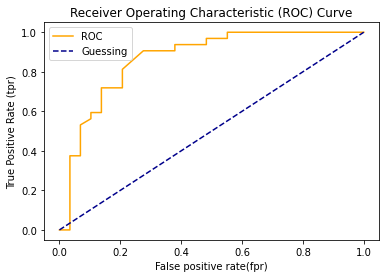

In [128]:
# Create a function for plotting ROC Curves
import matplotlib.pyplot as plt

def plot_roc_curve(fpr, tpr):
    """
    Plots a ROC curve given the false positive rate (fpr)
    and the true positive rate (tpr)
    """
    # plot roc curve
    plt.plot(fpr, tpr, color="orange", label="ROC")
    #Plot line with no predictive power- baseline
    plt.plot([0, 1], [0, 1], color="darkblue", linestyle = "--", label="Guessing") # here he just chose random values
    
    # Customize the plot
    plt.xlabel("False positive rate(fpr)")
    plt.ylabel("True Positive Rate (tpr)")
    plt.title("Receiver Operating Characteristic (ROC) Curve")
    plt.legend()
    plt.show()
    
plot_roc_curve(fpr, tpr)

In [129]:
from sklearn.metrics import roc_auc_score

roc_auc_score(y_test, y_probs_positive)

0.8669181034482759

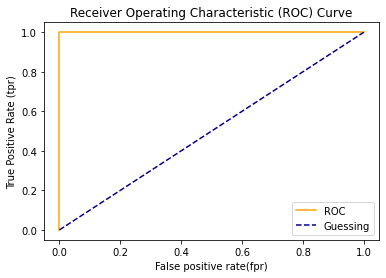

In [130]:
# Plot perfect ROC Curve and AUC Score
fpr, tpr, thresholds = roc_curve(y_test, y_test)
plot_roc_curve(fpr, tpr)

In [131]:
# Perfect AUC Score
roc_auc_score(y_test, y_test)

1.0

#### Confusion Matrix

A confusion matrix  is a quick way to compare the labels a model predicts and the actual labels it was supposed
to predict 

In essence, giving you an idea of where the model is getting confused

In [132]:
from sklearn.metrics import confusion_matrix

y_preds = clf.predict(X_test)

confusion_matrix(y_test, y_preds) # comparing the TRUE labels vs the PREDICTED labels

array([[23,  6],
       [ 6, 26]])

In [133]:
# Visua;ize confusion matrix with pd.crosstab()

pd.crosstab(y_test,
           y_preds,
           rownames=["Actual Label"],
           colnames=["Predicted Labels"])

Predicted Labels,0,1
Actual Label,,
0,23,6
1,6,26


In [134]:
"""
23TN  6FN
 4FP 28TP

"""

'\n23TN  6FN\n 4FP 28TP\n\n'

In [135]:
23 + 6 + 4 + 28 # add up the numbers in the confusion matrix

61

In [136]:
len(y_preds)

61

<AxesSubplot:>

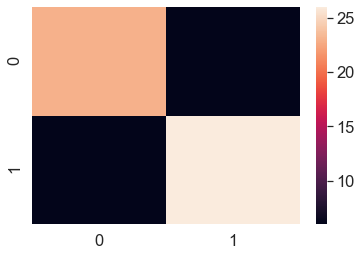

In [137]:
# Make our confusion matrix more visual with Seaborn's heat map
import seaborn as sns
import matplotlib.pyplot as plt

# set the font scale
sns.set(font_scale=1.5)

#Create Confusion Matrix
conf_mat = confusion_matrix(y_test, y_preds)

#Plot it using Seaborn
sns.heatmap(conf_mat)


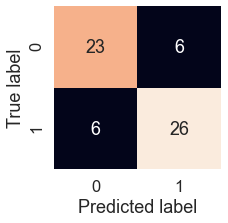

In [138]:
def plot_conf_mat(conf_mat):
    """
    Plot a confusion matrix using Seaborn's heatmap()
    """
    fig, ax = plt.subplots(figsize=(3,3))
    ax = sns.heatmap(conf_mat,
                    annot=True, # Annotate the conf_map info
                    cbar=False)
    plt.xlabel("Predicted label")
    plt.ylabel("True label");
    
plot_conf_mat(conf_mat)

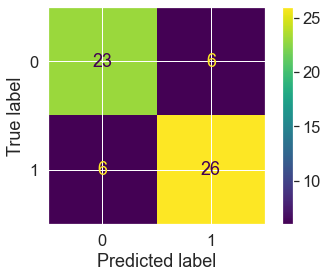

In [139]:
from sklearn.metrics import plot_confusion_matrix
plot_confusion_matrix(clf, X_test, y_test)

**Classification Report**

In [140]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_preds))

              precision    recall  f1-score   support

           0       0.79      0.79      0.79        29
           1       0.81      0.81      0.81        32

    accuracy                           0.80        61
   macro avg       0.80      0.80      0.80        61
weighted avg       0.80      0.80      0.80        61



In [141]:
# We have seen a lot of evaluations of our model now. When do we use each of these??

# Where Precision and recall become valuable: For example, 10,0000 people are sampled and 1 has a disease- 
# Who has the disease?

disease_true=np.zeros(10000)
disease_true[0]=1 # only one positive case

disease_preds = np.zeros(10000) #model predicts every case as 0

pd.DataFrame(classification_report(disease_true,
                                  disease_preds,
                                  output_dict=True))



/opt/anaconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/anaconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/anaconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


,0.0,1.0,accuracy,macro avg,weighted avg
precision,0.99990,0.0,0.9999,0.499950,0.99980
recall,1.00000,0.0,0.9999,0.500000,0.99990
f1-score,0.99995,0.0,0.9999,0.499975,0.99985
support,9999.00000,1.0,0.9999,10000.000000,10000.00000


## So above you have a very large class imbalance and the accuracy is misleading!!

# Regression Model Evaluation Metrics
Model evaluation metrics documentation- https://scikit-learn.org/stable/modules/model_evaluation.html

1. R^2 (coefficient of determination)
2. Mean absolute error (MAE)
3. Mean Squared Error (MSE)

**R^2**

Compares your models predictions to the mean of the targets
can range from -inf(?? a number squared can't be negative) to 1
If all your model does is predict the mean of the targets--> it's R^2 value is 0
If your model predicts perfectly a range of numbers--> it's R^2 value is 1

In [142]:
from sklearn.ensemble import RandomForestRegressor

np.random.seed(42)

X = boston_df.drop("target", axis=1)
y = boston_df["target"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

model = RandomForestRegressor()

model.fit(X_train, y_train);

In [143]:
model.score(X_test, y_test) #

0.8654448653350507

In [144]:
from sklearn.metrics import r2_score

# Fill an array with y_test mean (the mean values from the y_test dataset)
y_test_mean = np.full(len(y_test), y_test.mean()) 

In [145]:
y_test_mean

array([21.48823529, 21.48823529, 21.48823529, 21.48823529, 21.48823529,
       21.48823529, 21.48823529, 21.48823529, 21.48823529, 21.48823529,
       21.48823529, 21.48823529, 21.48823529, 21.48823529, 21.48823529,
       21.48823529, 21.48823529, 21.48823529, 21.48823529, 21.48823529,
       21.48823529, 21.48823529, 21.48823529, 21.48823529, 21.48823529,
       21.48823529, 21.48823529, 21.48823529, 21.48823529, 21.48823529,
       21.48823529, 21.48823529, 21.48823529, 21.48823529, 21.48823529,
       21.48823529, 21.48823529, 21.48823529, 21.48823529, 21.48823529,
       21.48823529, 21.48823529, 21.48823529, 21.48823529, 21.48823529,
       21.48823529, 21.48823529, 21.48823529, 21.48823529, 21.48823529,
       21.48823529, 21.48823529, 21.48823529, 21.48823529, 21.48823529,
       21.48823529, 21.48823529, 21.48823529, 21.48823529, 21.48823529,
       21.48823529, 21.48823529, 21.48823529, 21.48823529, 21.48823529,
       21.48823529, 21.48823529, 21.48823529, 21.48823529, 21.48

In [146]:
 y_test.mean() 

21.488235294117654

In [147]:
r2_score(y_test, y_test_mean) # i.e. if the model just predicted the mean

2.220446049250313e-16

In [148]:
r2_score(y_test, y_test) # if the model fit the test data perfectly

1.0

**Mean Absolute Error (MAE)**

In [149]:
# Mean Absolute Error
from sklearn.metrics import mean_absolute_error
y_preds = model.predict(X_test)
mae = mean_absolute_error(y_test, y_preds)
mae

2.136382352941176

In [150]:
df = pd.DataFrame(data={"actual_values": y_test,
                       "predicted values": y_preds})
df["differences"]= df["predicted values"]- df["actual_values"]
df

,actual_values,predicted values,differences
173,23.6,23.081,-0.519
274,32.4,30.574,-1.826
491,13.6,16.759,3.159
72,22.8,23.460,0.660
452,16.1,16.893,0.793
...,...,...,...
412,17.9,13.159,-4.741
436,9.6,12.476,2.876
411,17.2,13.612,-3.588
86,22.5,20.205,-2.295


#### so the mae is the average of the abs|differences| shown above- i.e. gets the abs value of each difference, adds them up then averages them
#### it gives you an idea of how wrong your models are

**Mean Squared Error- same as above, however the differences are squared then adds them then averaged**

In [151]:
# Mean squared error
from sklearn.metrics import mean_squared_error
y_preds = model.predict(X_test)
mse = mean_squared_error(y_test, y_preds)
mse

9.867437068627442

In [152]:
# Calculate MSE by hand **BANG!**
squared = np.square(df["differences"])
squared.mean()

9.867437068627439

### Rule of thumb:
1. "pay more attention to MAE: When being 10,000 off is **twice** as bad as being '5,000' off"
2. "Pay more attention to MSE: When being 10,000 off is **more than twice** as bad as being '5,000' off"

### Classification Model Evaluation Metrics/Techniques
Accuracy - The accuracy of the model in decimal form. Perfect accuracy is equal to 1.0.

Precision - Indicates the proportion of positive identifications (model predicted class 1) which were actually correct. A model which produces no false positives has a precision of 1.0.

Recall - Indicates the proportion of actual positives which were correctly classified. A model which produces no false negatives has a recall of 1.0.

F1 score - A combination of precision and recall. A perfect model achieves an F1 score of 1.0.

Confusion matrix - Compares the predicted values with the true values in a tabular way, if 100% correct, all values in the matrix will be top left to bottom right (diagonal line).

Cross-validation - Splits your dataset into multiple parts and train and tests your model on each part then evaluates performance as an average.

Classification report - Sklearn has a built-in function called classification_report() which returns some of the main classification metrics such as precision, recall and f1-score.

ROC Curve - Also known as receiver operating characteristic is a plot of true positive rate versus false-positive rate.

Area Under Curve (AUC) Score - The area underneath the ROC curve. A perfect model achieves an AUC score of 1.0.

**Which classification metric should you use?**

Accuracy is a good measure to start with if all classes are balanced (e.g. same amount of samples which are labelled with 0 or 1).

Precision and recall become more important when classes are imbalanced.

If false-positive predictions are worse than false-negatives, aim for higher precision.

If false-negative predictions are worse than false-positives, aim for higher recall.

F1-score is a combination of precision and recall.

A confusion matrix is always a good way to visualize how a classification model is going.

Regression Model Evaluation Metrics/Techniques

R^2 (pronounced r-squared) or the coefficient of determination - Compares your model's predictions to the mean of the targets. Values can range from negative infinity (a very poor model) to 1. For example, if all your model does is predict the mean of the targets, its R^2 value would be 0. And if your model perfectly predicts a range of numbers it's R^2 value would be 1.

Mean absolute error (MAE) - The average of the absolute differences between predictions and actual values. It gives you an idea of how wrong your predictions were.

Mean squared error (MSE) - The average squared differences between predictions and actual values. Squaring the errors removes negative errors. It also amplifies outliers (samples which have larger errors).

Which regression metric should you use?

R2 is similar to accuracy. It gives you a quick indication of how well your model might be doing. Generally, the closer your R2 value is to 1.0, the better the model. But it doesn't really tell exactly how wrong your model is in terms of how far off each prediction is.

MAE gives a better indication of how far off each of your model's predictions are on average.

As for MAE or MSE, because of the way MSE is calculated, squaring the differences between predicted values and actual values, it amplifies larger differences. Let's say we're predicting the value of houses (which we are).

Pay more attention to MAE: When being $10,000 off is twice as bad as being $5,000 off.

Pay more attention to MSE: When being $10,000 off is more than twice as bad as being $5,000 off.

For more resources on evaluating a machine learning model, be sure to check out the following resources:

Scikit-Learn documentation for metrics and scoring (quantifying the quality of predictions)

Beyond Accuracy: Precision and Recall by Will Koehrsen

Stack Overflow answer describing MSE (mean squared error) and RSME (root mean squared error)


<img src='classification_report_anatomy.png' width=600/>


## Finally using the scoring parameter


In [153]:
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier

np.random.seed(42)

X = hd.drop("target", axis = 1)
y = hd["target"]

# X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.2) since we're measuring accuracy we don't need this

clf = RandomForestClassifier()




In [154]:
np.random.seed(42)
cv_acc = cross_val_score(clf, X, y, cv=5)
cv_acc

array([0.81967213, 0.90163934, 0.83606557, 0.78333333, 0.78333333])

In [155]:
# Cross-validated accuracy
print(f'The cross-validated accuracy is: {np.mean(cv_acc)*100.:.2f}%')

The cross-validated accuracy is: 82.48%


In [156]:
np.random.seed(42)
cv_acc = cross_val_score(clf, X, y, cv=5, scoring="accuracy")
print(f'The cross-validated accuracy is: {np.mean(cv_acc)*100.:.2f}%')

The cross-validated accuracy is: 82.48%


In [157]:
cv_precision = cross_val_score(clf, X, y, cv=5, scoring="precision") 
cv_precision

array([0.76315789, 0.90322581, 0.83870968, 0.79411765, 0.74358974])

In [158]:
np.mean(cv_precision)

0.8085601538512754

In [159]:
# Recall
cv_recall = cross_val_score(clf, X, y, cv=5, scoring="recall") 
cv_recall

array([0.87878788, 0.84848485, 0.78787879, 0.78787879, 0.90909091])

In [160]:
np.mean(cv_recall)

0.8424242424242424

In [161]:
# f1
cv_f1 = cross_val_score(clf, X, y, cv=5, scoring="f1") 
np.mean(cv_f1)

0.841476533416832

**How about our regression model**

In [162]:
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestRegressor

np.random.seed(42)

X = boston_df.drop("target", axis=1)
y = boston_df["target"]

model = RandomForestRegressor(n_estimators=100)



In [163]:
np.random.seed(42)
cv_r2 = cross_val_score(model, X, y, scoring=None)
cv_r2

array([0.77231143, 0.86035935, 0.74664002, 0.47632078, 0.26630379])

In [164]:
np.random.seed(42)
cv_r2 = cross_val_score(model, X, y, scoring="r2")
cv_r2

array([0.77231143, 0.86035935, 0.74664002, 0.47632078, 0.26630379])

In [165]:
np.mean(cv_r2)

0.6243870737930857

https://scikit-learn.org/stable/modules/model_evaluation.html

In [166]:
# Mean Absolute Error - Why neg?? All scorer objects by convention: "Higher return values are assumed to be better 
# than lower return values"
# Thus metrics which measure the distance between the model and the data, like metrics.mean_squared_error, 
# are available as neg_mean_squared_error which return the negated value of the metric.
cv_mae = cross_val_score(model, X, y, cv=5, scoring="neg_mean_absolute_error")
cv_mae

array([-2.13045098, -2.49771287, -3.45471287, -3.81509901, -3.11813861])

**Mean Squared Error (MSE)**

In [167]:
np.random.seed(42)
cv_mse = cross_val_score(model, X, y, cv=5, scoring="neg_mean_squared_error")
cv_mse

array([ -7.86326927, -12.71243178, -20.29089194, -45.93287403,
       -19.50774726])

In [168]:
np.mean(cv_mse)

-21.261442856882137

### Using different evaluation metrics as scikit-learn functions
**Classification evaluation functions**
https://scikit-learn.org/stable/modules/model_evaluation.html#classification-metrics

In [169]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

np.random.seed(42)

X = hd.drop("target", axis = 1)
y = hd["target"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

clf = RandomForestClassifier()
clf.fit(X_train, y_train)

# Make some predictions- bacause what is an evaluation metric doing but comparing model predictions to truth labels
y_preds = clf.predict(X_test)

# Evaluate the classifier using scikit-learn functions
print("Classifier metrics on the test set:")
print(f'Accuracy: {accuracy_score(y_test, y_preds)*100:.2f}%')
print(f'Precision: {precision_score(y_test, y_preds)}')
print(f'Recall: {recall_score(y_test, y_preds)}')
print(f'f1: {f1_score(y_test, y_preds)}')


Classifier metrics on the test set:
Accuracy: 85.25%
Precision: 0.8484848484848485
Recall: 0.875
f1: 0.8615384615384615


**Regression evaluation functions**

In [170]:
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split

np.random.seed(42)

X = boston_df.drop("target", axis=1)
y = boston_df["target"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

model = RandomForestRegressor()
model.fit(X_train, y_train)

# Make predictions using regression model
y_preds = model.predict(X_test)

# Evaluate the model 
print("Regression model predictions on the test set:")
print(f'r^2: {r2_score(y_test, y_preds)}')
print(f'Mean Absolute Error: {mean_absolute_error(y_test, y_preds)}')
print(f'Mean Squared Error: {mean_squared_error(y_test, y_preds)}')

Regression model predictions on the test set:
r^2: 0.8654448653350507
Mean Absolute Error: 2.136382352941176
Mean Squared Error: 9.867437068627442


# Improving the Model

First predictions => lead to baseline model
you will often have to improve upon this

From a data perspective:
* Could we collect more data? (generally the more data the better
* Could we improve our data?

From a model perspective:
* Is there a better model we could use? (look at the scikit-learn ML map)
* Could we improve the current model? (ensemble methods, adjusting hyper-parameters)

Hyper-parameters vs. parameters
* Parameters => model finds these in data
* Hyper-parameters => settings on the model that you can adjust to (potentially) improve its ability to find patterns

Three ways to adjust hyper-parameters:
1. By hand
2. Randomly with RandomSearchCV
3. Exhaustively by GridsearchCV

# How do you find a model's hyper-parameters??

In [171]:
from sklearn.ensemble import RandomForestClassifier

clf = RandomForestClassifier()

In [172]:
# you can start by finding hyper-parameters by first calling up the models parameters
clf.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

#### If you look at RandomForestClassifier- you can adjust the parameters by adjusting the n_estimators
#### Look at the RandomForestClassifier Data

# Different ways to adjust hyper-parameters:

## Tuning Hyperparameters by Hand
**he has a very cool picture that should be imported into this notebook**
**apparently, the way data is split, we use 80% to train and 20% to test (test-split)**
**straight-up 80% is used to train the data**
**you could take this 20% and split it into two-10% categories**
* 1-10% could be used to evaluate the model
* The other 10% could be used to tune the hyperparameters
<img src='hyperparameter.png' width=600/>

In [173]:
# Knowing the above, let's make 3 sets: training, validation, and test
clf.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

**We're going to adjust the following (find definitions below in the RandomForestClassifier sckit-learn page)**
* 'max_depth'
* 'max_features'
* 'min_samples_leaf'
* 'min_samples_split'
* 'n_estimators'

In [174]:
# Since we are going to be evaluating a few models: we should write an evaluation function
def evaluate_preds(y_true, y_preds):
    """
    Performs evaluation comparison on y_true labels vs. y_pred labels
    on a classification.
    """
    accuracy = accuracy_score(y_true, y_preds)
    precision = precision_score(y_true, y_preds)
    recall = recall_score(y_true, y_preds)
    f1 = f1_score(y_true, y_preds)
    metric_dict = {"accuracy": round(accuracy, 2),
                   "precision": round(precision, 2),
                   "recall": round(recall, 2),
                   "f1": round(f1, 2)}
    print(f"Acc: {accuracy * 100:.2f}%")
    print(f"Precision: {precision:.2f}")
    print(f"Recall: {recall:.2f}")
    print(f"F1 score: {f1:.2f}")
    
    return metric_dict

In [175]:
# we now have to slit our data by hand
# heart_disease

In [176]:
from sklearn.ensemble import RandomForestClassifier

np.random.seed(42)

# here is where we will split the test data into a validation and test set (think like "practice-exam", "real-exam")
# we will use pandas frac function
heart_disease_shuffled = heart_disease.sample(frac=1) # takes the heart-dis. data set and randomly shuffles it

# Split into X & y
X = heart_disease_shuffled.drop("target", axis = 1)
y = heart_disease_shuffled["target"]

# split the data into train, validation, and test sets
train_split = round(0.7 * len(heart_disease_shuffled)) # taking 70% of data
valid_split = round(train_split + 0.15 * len(heart_disease_shuffled)) # 15% of the data
X_train, y_train = X[:train_split], y[:train_split]
X_valid, y_valid = X[train_split:valid_split], y[train_split:valid_split]
X_test, y_test = X[valid_split:], y[valid_split:]

# len(X_train), len(y_valid), len(X_test) # gives us the number of rows we just wanted to see

clf = RandomForestClassifier()
clf.fit(X_train, y_train) # fit on the training data

# Make baseline predictions
y_preds = clf.predict(X_valid) # we've evaluated the baseline hyper-parameters on a validation set=>get metrics below

# Evaluate the classifier on validation set
baseline_metrics = evaluate_preds(y_valid, y_preds)



                    

Acc: 82.22%
Precision: 0.81
Recall: 0.88
F1 score: 0.85


**If we were to try to improve our results, we can adjust our model's hyper-parameters listed above**
- change n_estimators

In [177]:
np.random.seed(42)

# create a different classifier, with different hyper-parameters
clf_2 = RandomForestClassifier(n_estimators=200)
# Then you fit it on the training data
clf_2.fit(X_train, y_train)

# Make predictions with different hyper-parameters (I increased the # of estimators)
y_preds_2 = clf_2.predict(X_valid)

# Evaluate the second classifier
clf_2_metrics = evaluate_preds(y_valid, y_preds) # in this case y_true is y_valid

Acc: 82.22%
Precision: 0.81
Recall: 0.88
F1 score: 0.85


### For me improving this hyper-parameter didn't do anything, but it did in his model b/c of his version of sci-kit learn is below mine which already comes with 100 estimators.

In [178]:
# What dial to turn next? max_depth?? which shows up below=> go to docs ()
clf.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

#### clf_3 = RandomForestClassifier(n_estimators=100, max_depth=10)
#### OK,OK, we could try to keep changing these hyper-parameters by hand until forever
#### It turns out that scikit-learn has a way to do this:
- Randomized search_CV

think of it tuning the hyper-paramters like this:

<img src='study_test_hyperparameters.png' width=600/>



### Hyper-parameter tuning with RandomizedSearchCV
#### Remember our 5 fold cross validation model (cv=5)

<img src='5_fold_cross_validation.png' width=600/>

In [179]:
from sklearn.model_selection import RandomizedSearchCV

# Create grid of hyperparameters we'd like to adjust

grid = {"n_estimators":[10, 100, 200, 500, 1000, 1200],
       "max_depth":[None, 5, 10, 20, 30],
       "max_features": ["auto", "sqrt"],
       "min_samples_split":[2, 4, 6], 
       "min_samples_leaf":[1, 2, 4]}

np.random.seed(42)

# Split into X, y
X = heart_disease_shuffled.drop("target", axis = 1)
y = heart_disease_shuffled["target"]

# Split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# Instantiate RandomForestClassifier model
clf = RandomForestClassifier(n_jobs=-1)

# Setup RandomizedSearchCV
rs_clf = RandomizedSearchCV(estimator=clf,
                           param_distributions=grid,
                           n_iter=10, # number of models to try
                           cv=5,
                           verbose=2)

# Fit the RandomizedSearchCV version of clf
rs_clf.fit(X_train, y_train) # the reason why you have to fit it to X_train/y_train is b/c is because the CV stands for 
# Cross-Validation, i.e. it's going to make our **validation sets for us**

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV] END max_depth=5, max_features=sqrt, min_samples_leaf=2, min_samples_split=6, n_estimators=1200; total time=   3.8s
[CV] END max_depth=5, max_features=sqrt, min_samples_leaf=2, min_samples_split=6, n_estimators=1200; total time=   1.3s
[CV] END max_depth=5, max_features=sqrt, min_samples_leaf=2, min_samples_split=6, n_estimators=1200; total time=   1.3s
[CV] END max_depth=5, max_features=sqrt, min_samples_leaf=2, min_samples_split=6, n_estimators=1200; total time=   1.2s
[CV] END max_depth=5, max_features=sqrt, min_samples_leaf=2, min_samples_split=6, n_estimators=1200; total time=   1.3s
[CV] END max_depth=30, max_features=auto, min_samples_leaf=2, min_samples_split=4, n_estimators=100; total time=   0.2s
[CV] END max_depth=30, max_features=auto, min_samples_leaf=2, min_samples_split=4, n_estimators=100; total time=   0.2s
[CV] END max_depth=30, max_features=auto, min_samples_leaf=2, min_samples_split=4, n_estimators=100

RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(n_jobs=-1),
                   param_distributions={'max_depth': [None, 5, 10, 20, 30],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [2, 4, 6],
                                        'n_estimators': [10, 100, 200, 500,
                                                         1000, 1200]},
                   verbose=2)

In [180]:
# we will now call a function which will show us what combination of params was best
rs_clf.best_params_

{'n_estimators': 200,
 'min_samples_split': 6,
 'min_samples_leaf': 2,
 'max_features': 'sqrt',
 'max_depth': None}

In [181]:
# Now when we call 'predict' it will use those best params right above for the predictions
rs_y_preds = rs_clf.predict(X_test)
# Make predictions with the best hyperparameters
rs_metrics = evaluate_preds(y_test, rs_y_preds)

Acc: 81.97%
Precision: 0.77
Recall: 0.86
F1 score: 0.81


## This didn't improve anything- HOWEVER, the lesson learned is that instead of running everything by hand, this RandomizedSearchCV helps us tune these hyperparameters 

**Where do we go from here in our quest for optimized hyper-parameters**

### Hyperparameter tuning with GridSearchCV

In [182]:
grid

{'n_estimators': [10, 100, 200, 500, 1000, 1200],
 'max_depth': [None, 5, 10, 20, 30],
 'max_features': ['auto', 'sqrt'],
 'min_samples_split': [2, 4, 6],
 'min_samples_leaf': [1, 2, 4]}

#### The difference between RandomizedSearchCV and GridSearchCV is that GridSearchCV will go through ALL the combinations whereas RandomizedSearchCV is limited by the n_iter parameter

In [183]:
print(f' GridSearchCV will try all {6*5*2*3*3*5} parameters')

 GridSearchCV will try all 2700 parameters


In [184]:
# cmd-paste from above's grid- but we inser the BEST paramters as output by rs_clf.best_params_
# What he does is follow the abovw but seems to keep a few other values for an unknown reason
grid_2= {'n_estimators': [100, 200, 500],
         'max_depth': [None],
         'max_features': ['auto', 'sqrt'],
         'min_samples_split': [6],
         'min_samples_leaf': [1, 2]}

In [185]:
print(f'Now we have {3*1*2*1*2*5} parameters to deal with instead of 2700')

Now we have 60 parameters to deal with instead of 2700


In [186]:
from sklearn.model_selection import GridSearchCV, train_test_split

np.random.seed(42)

# Split into X, y
X = heart_disease_shuffled.drop("target", axis = 1)
y = heart_disease_shuffled["target"]

# Split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# Instantiate RandomForestClassifier model
clf = RandomForestClassifier(n_jobs=-1)

# Setup GridSearchCV
gs_clf = GridSearchCV(estimator=clf,
                           param_grid=grid_2,
                           cv=5,
                           verbose=2)

# Fit the GridSearchCV version of clf
gs_clf.fit(X_train, y_train);

Fitting 5 folds for each of 12 candidates, totalling 60 fits
[CV] END max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=6, n_estimators=100; total time=   0.3s
[CV] END max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=6, n_estimators=100; total time=   0.2s
[CV] END max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=6, n_estimators=100; total time=   0.2s
[CV] END max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=6, n_estimators=100; total time=   0.2s
[CV] END max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=6, n_estimators=100; total time=   0.2s
[CV] END max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=6, n_estimators=200; total time=   0.4s
[CV] END max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=6, n_estimators=200; total time=   0.3s
[CV] END max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=6, 

In [187]:
gs_clf.best_params_ #GridSearchCV


{'max_depth': None,
 'max_features': 'sqrt',
 'min_samples_leaf': 1,
 'min_samples_split': 6,
 'n_estimators': 200}

In [188]:
rs_clf.best_params_ # And RandomizedSearchCV

{'n_estimators': 200,
 'min_samples_split': 6,
 'min_samples_leaf': 2,
 'max_features': 'sqrt',
 'max_depth': None}

In [189]:
# Let's see the predictions made with GridSearchCV
gs_y_preds = gs_clf.predict(X_test)

# Evaluate the predictions
gs_metrics = evaluate_preds(y_test, gs_y_preds)

Acc: 78.69%
Precision: 0.74
Recall: 0.82
F1 score: 0.78


### Result: No improvement in cross-validation scores, but we just illustrated a means to go about tuning hyperparameters. Workflow is like this:
1. By Hand
2. RandomizedSearchCV
3. GridSearchCV

Let's compare our different models metrics

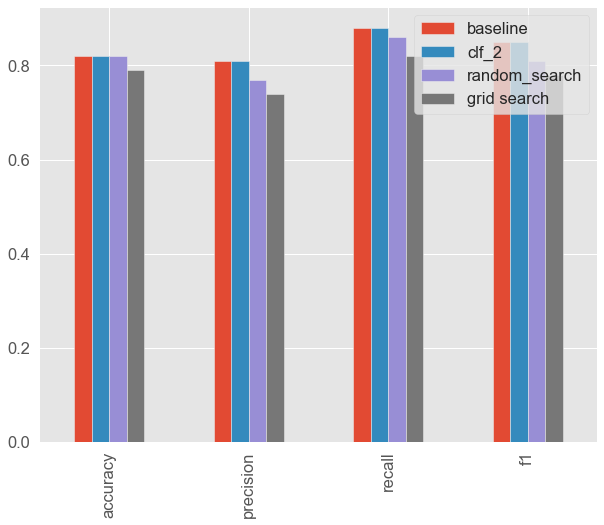

In [190]:
plt.style.use('ggplot')
compare_metrics = pd.DataFrame({"baseline": baseline_metrics,
                               "clf_2": clf_2_metrics,
                               "random_search": rs_metrics,
                               "grid search": gs_metrics})

compare_metrics.plot.bar(figsize=(10, 8));

<img src='classification_report_anatomy.png' width=600/>

# Saving and Loading trained machine Learning Data
**Two way's of doing this**
1. With Python's `pickle` module
2. With the `joblib` module

**Pickle**

In [191]:
import pickle

# save an existing model to file
pickle.dump(gs_clf, open("gs_random_forest_model_1.pk1", "wb")) #"wb" = write binary

In [192]:
# we can load it in by:

loaded_pickle_model = pickle.load(open("gs_random_forest_model_1.pk1", "rb")) #"rb"=> read binary

In [193]:
loaded_pickle_model

GridSearchCV(cv=5, estimator=RandomForestClassifier(n_jobs=-1),
             param_grid={'max_depth': [None], 'max_features': ['auto', 'sqrt'],
                         'min_samples_leaf': [1, 2], 'min_samples_split': [6],
                         'n_estimators': [100, 200, 500]},
             verbose=2)

In [194]:
# we can check it by making some predictions- must re-instantiate X_test, y_test--> he screwed up

from sklearn.model_selection import GridSearchCV, train_test_split

np.random.seed(42)

# Split into X, y
X = heart_disease_shuffled.drop("target", axis = 1)
y = heart_disease_shuffled["target"]

# Split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

pickle_y_preds = loaded_pickle_model.predict(X_test)
evaluate_preds(y_test, pickle_y_preds)

Acc: 78.69%
Precision: 0.74
Recall: 0.82
F1 score: 0.78


{'accuracy': 0.79, 'precision': 0.74, 'recall': 0.82, 'f1': 0.78}

## Now we do the same thing with the `joblib` module
In the specific case of scikit-learn, it may be better to use joblib’s replacement of pickle (dump & load), which is more efficient on objects that carry large numpy arrays internally as is often the case for fitted scikit-learn estimators (which is our case here), but can only pickle to the disk and not to a string:

* from joblib import dump, load
* dump(clf, 'filename.joblib') 

In [195]:
from joblib import dump, load

# To save a model to a file
dump(gs_clf, filename="gs_random_forest_model_1.joblib")

['gs_random_forest_model_1.joblib']

In [196]:
# In order to load a joblib file
loaded_joblib_model = load(filename="gs_random_forest_model_1.joblib")

In [197]:
# Make and evaluate joblib predictions
joblib_y_preds = loaded_joblib_model.predict(X_test)
evaluate_preds(y_test, joblib_y_preds)

Acc: 78.69%
Precision: 0.74
Recall: 0.82
F1 score: 0.78


{'accuracy': 0.79, 'precision': 0.74, 'recall': 0.82, 'f1': 0.78}

# Putting it all together

In [198]:
# regression problem : predicting the sale price of cars
car_sales_missing

,Make,Colour,Odometer (KM),Doors,Price
0,Honda,White,35431.0,4.0,15323.0
1,BMW,Blue,192714.0,5.0,19943.0
2,Honda,White,84714.0,4.0,28343.0
3,Toyota,White,154365.0,4.0,13434.0
4,Nissan,Blue,181577.0,3.0,14043.0
...,...,...,...,...,...
995,Toyota,Black,35820.0,4.0,32042.0
996,NaN,White,155144.0,3.0,5716.0
997,Nissan,Blue,66604.0,4.0,31570.0
998,Honda,White,215883.0,4.0,4001.0


In [199]:
data = pd.read_csv("/Users/chrisgaughan/Desktop/ml_course_udemy_Laptop/sample_project_udemy/scikit-learn-data/car-sales-extended-missing-data.csv")

In [200]:
data

,Make,Colour,Odometer (KM),Doors,Price
0,Honda,White,35431.0,4.0,15323.0
1,BMW,Blue,192714.0,5.0,19943.0
2,Honda,White,84714.0,4.0,28343.0
3,Toyota,White,154365.0,4.0,13434.0
4,Nissan,Blue,181577.0,3.0,14043.0
...,...,...,...,...,...
995,Toyota,Black,35820.0,4.0,32042.0
996,NaN,White,155144.0,3.0,5716.0
997,Nissan,Blue,66604.0,4.0,31570.0
998,Honda,White,215883.0,4.0,4001.0


In [201]:
data.dtypes

Make              object
Colour            object
Odometer (KM)    float64
Doors            float64
Price            float64
dtype: object

In [202]:
data.isna().sum()

Make             49
Colour           50
Odometer (KM)    50
Doors            50
Price            50
dtype: int64

**Pipeline**

# Steps we need to take
1. Fill missing data
2. Convert data to numbers
3. Build a model on the data

In [203]:
# Getting data ready
import pandas as pd 
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder

#Modelling
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split, GridSearchCV

# Random seed
import numpy as np 
np.random.seed(42)

# import data and drop the rows with missing labels
data = pd.read_csv("/Users/chrisgaughan/Desktop/ml_course_udemy_Laptop/sample_project_udemy/scikit-learn-data/car-sales-extended-missing-data.csv")
data.dropna(subset=["Price"], inplace=True) # drop the missing price values

# Define different features and transformer pipeline
categorical_features = ["Make", "Colour"]
categorical_transformer = Pipeline(steps=[
    ("imputer", SimpleImputer(strategy="constant", fill_value="missing")),
    ("onehot", OneHotEncoder(handle_unknown="ignore"))
])

door_feature = ["Doors"]
door_transformer = Pipeline(steps=[
    ("imputer", SimpleImputer(strategy="constant", fill_value=4))
])

numeric_features = ["Odometer (KM)"]
numeric_transformer = Pipeline(steps=[
    ("imputer", SimpleImputer(strategy="mean"))
])

# Setup preprocessing steps
preprocessor = ColumnTransformer(
                                transformers=[
                                    ("categorical", categorical_transformer, categorical_features),
                                    ("door", door_transformer, door_feature),
                                    ("numerical", numeric_transformer, numeric_features)
                                ])

# Create a preprocessing and modelling pipeline
model = Pipeline(steps=[("preprocessor", preprocessor),
                                   ("model", RandomForestRegressor())])

#Split data
X = data.drop("Price", axis=1)
y = data["Price"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# Fit and score the model
model.fit(X_train, y_train)


                   


Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('categorical',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(fill_value='missing',
                                                                                 strategy='constant')),
                                                                  ('onehot',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  ['Make', 'Colour']),
                                                 ('door',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(fill_value=4,
                                                                                 strategy='constant'))]),
                      

In [204]:
model.score(X_test, y_test) #seems like a terrible score to ME

0.22188417408787875

**It's also possible to use `GridsearchCV` or `RandomizedSearchCV` with `Pipeline`.**

In [205]:
# Use GridsearchCV with our pipeline- Make your grid of Hyper-parameters

from sklearn.model_selection import GridSearchCV
pipe_grid = {
    "preprocessor__numerical__imputer__strategy": ["mean", "median"],
    "model__n_estimators": [100, 1000],
    "model__max_depth": [None, 5],
    "model__max_features": ["auto"],
    "model__min_samples_split": [2, 4]
}

gs_model = GridSearchCV(model, pipe_grid, cv=5, verbose=2)
gs_model.fit(X_train, y_train)

Fitting 5 folds for each of 16 candidates, totalling 80 fits
[CV] END model__max_depth=None, model__max_features=auto, model__min_samples_split=2, model__n_estimators=100, preprocessor__numerical__imputer__strategy=mean; total time=   0.2s
[CV] END model__max_depth=None, model__max_features=auto, model__min_samples_split=2, model__n_estimators=100, preprocessor__numerical__imputer__strategy=mean; total time=   0.2s
[CV] END model__max_depth=None, model__max_features=auto, model__min_samples_split=2, model__n_estimators=100, preprocessor__numerical__imputer__strategy=mean; total time=   0.2s
[CV] END model__max_depth=None, model__max_features=auto, model__min_samples_split=2, model__n_estimators=100, preprocessor__numerical__imputer__strategy=mean; total time=   0.2s
[CV] END model__max_depth=None, model__max_features=auto, model__min_samples_split=2, model__n_estimators=100, preprocessor__numerical__imputer__strategy=mean; total time=   0.2s
[CV] END model__max_depth=None, model__max_f

[CV] END model__max_depth=5, model__max_features=auto, model__min_samples_split=2, model__n_estimators=100, preprocessor__numerical__imputer__strategy=median; total time=   0.2s
[CV] END model__max_depth=5, model__max_features=auto, model__min_samples_split=2, model__n_estimators=100, preprocessor__numerical__imputer__strategy=median; total time=   0.1s
[CV] END model__max_depth=5, model__max_features=auto, model__min_samples_split=2, model__n_estimators=100, preprocessor__numerical__imputer__strategy=median; total time=   0.1s
[CV] END model__max_depth=5, model__max_features=auto, model__min_samples_split=2, model__n_estimators=1000, preprocessor__numerical__imputer__strategy=mean; total time=   1.3s
[CV] END model__max_depth=5, model__max_features=auto, model__min_samples_split=2, model__n_estimators=1000, preprocessor__numerical__imputer__strategy=mean; total time=   1.3s
[CV] END model__max_depth=5, model__max_features=auto, model__min_samples_split=2, model__n_estimators=1000, pre

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('preprocessor',
                                        ColumnTransformer(transformers=[('categorical',
                                                                         Pipeline(steps=[('imputer',
                                                                                          SimpleImputer(fill_value='missing',
                                                                                                        strategy='constant')),
                                                                                         ('onehot',
                                                                                          OneHotEncoder(handle_unknown='ignore'))]),
                                                                         ['Make',
                                                                          'Colour']),
                                                                        ('door',
 

In [206]:
# Now we have to run `GridSearchCV: WE'VE IMPORTED IT ABOVE

# gs_model.get_params().keys()- this is how I de-bugged
# 

In [207]:
gs_model.score(X_test, y_test) # A little better

0.3339554263158365